# Mini Project III

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
seed = 0

## Customer Clusters

In [108]:
df_cust = pd.read_csv('project_data/twm_customer.csv', sep=';')
df_cust

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [109]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [12]:
df_cust.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [64]:
df_cust.groupby(['city_name']).mean()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
city_name,,,,,,,,
Albuquerque,1.362900e+06,20394.428571,37.571429,3.000000,0.571429,1.285714,7735.428571,87176.428571
Anaheim,1.363114e+06,18349.600000,39.400000,4.200000,1.200000,2.300000,5281.800000,92812.700000
Arlington,1.363082e+06,36464.000000,32.000000,2.000000,0.000000,1.000000,17068.000000,76017.000000
Atlanta,1.362748e+06,21161.500000,30.000000,4.500000,2.000000,3.000000,6529.500000,30332.000000
Austin,1.363095e+06,23248.181818,36.909091,3.545455,1.181818,1.909091,8128.636364,78741.454545
...,...,...,...,...,...,...,...,...
Tucson,1.363245e+06,21455.285714,45.857143,3.714286,0.285714,1.428571,8777.857143,85722.857143
Tulsa,1.363121e+06,15436.111111,49.444444,3.888889,1.000000,2.000000,6256.333333,74172.555556
Virginia Beach,1.363457e+06,86744.000000,57.000000,7.000000,0.000000,2.000000,10061.000000,23463.000000


In [66]:
X = df_cust.loc[:, ['income', 'age']]
X

,income,age
0,26150,46
1,6605,71
2,18548,38
3,47668,54
4,44554,59
...,...,...
742,14795,36
743,26387,56
744,61300,50
745,15100,37


Text(0, 0.5, 'Annual Income ($)')

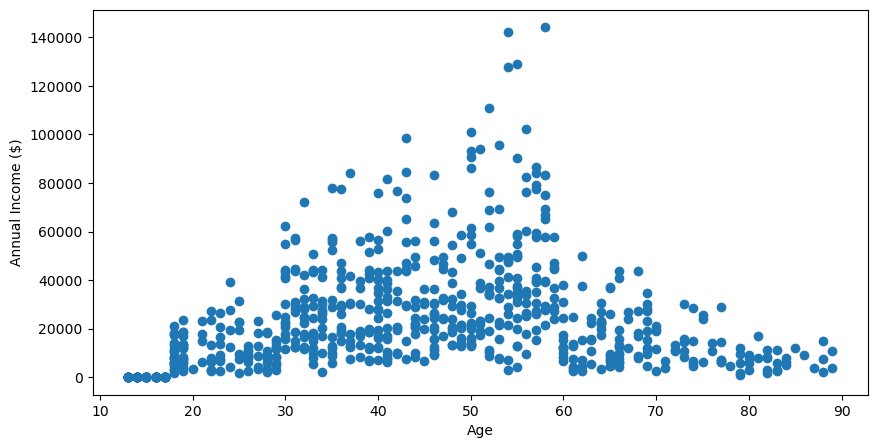

In [69]:
plt.figure(figsize=(10,5))
plt.scatter(x = X['age'], y = X['income'])
plt.xlabel('Age');
plt.ylabel('Annual Income ($)')

In [93]:
from sklearn.cluster import KMeans
km_cust = KMeans(n_clusters = 5)
km_cust.fit(X)

KMeans(n_clusters=5)

Text(0, 0.5, 'Annual Income ($)')

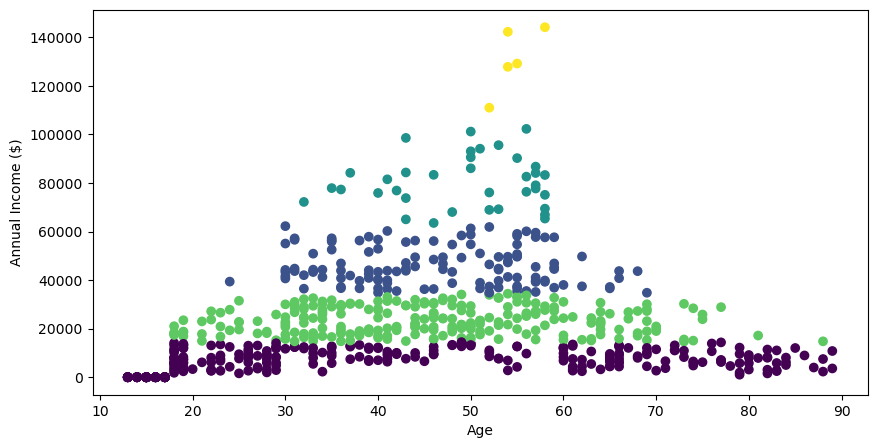

In [94]:
plt.figure(figsize=(10,5))
plt.scatter(x = X['age'], y = X['income'], c= km_cust.labels_)
plt.xlabel('Age');
plt.ylabel('Annual Income ($)')

In [105]:
wcss_cust = [] #Within cluster sum squares
for i in range(2,15):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(X)
    wcss_cust.append(km.inertia_)

In [106]:
wcss_cust

[133711301166.03735,
 66699107170.716194,
 37886249645.3024,
 27306996731.115356,
 17722482935.32248,
 12278331795.234259,
 8789430069.263811,
 6875073849.540686,
 5541894076.490701,
 4354115923.476124,
 3657324795.082026,
 3045229712.6946697,
 2679413877.4383483]

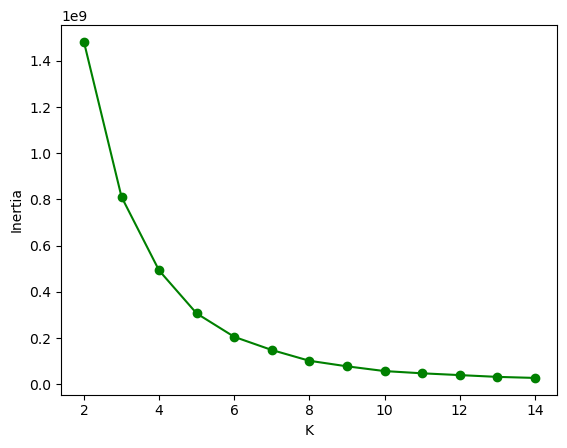

In [104]:
plt.plot(range(2,15), wcss_acc, 'og-')
plt.xlabel("K")
plt.ylabel("Inertia");

# Bank Account Clusters

In [10]:
df_acc = pd.read_csv('project_data/twm_accounts.csv', sep=';')
df_acc

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28
...,...,...,...,...,...,...,...,...
1404,4561143213625560,1362556,CC,N,20.1.1992,19.8.1995,1433.94,20.00
1405,4561143213626240,1362624,CC,Y,29.11.1990,NaN,632.75,1400.00
1406,4561143213628750,1362875,CC,Y,24.2.1989,NaN,2810.91,3000.00
1407,13626543,1362654,SV,Y,17.10.1992,NaN,784.53,622.46


In [34]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   int64  
 1   cust_id           1409 non-null   int64  
 2   acct_type         1409 non-null   object 
 3   account_active    1409 non-null   object 
 4   acct_start_date   1409 non-null   object 
 5   acct_end_date     143 non-null    object 
 6   starting_balance  1409 non-null   float64
 7   ending_balance    1409 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 88.2+ KB


In [33]:
df_acc.describe()

,acct_nbr,cust_id,starting_balance,ending_balance
count,1.409000e+03,1.409000e+03,1409.00000,1409.000000
mean,1.514986e+15,1.362989e+06,1435.35357,1011.754336
std,2.148991e+15,2.940584e+02,2186.69662,1559.986310
min,1.362480e+07,1.362480e+06,0.00000,0.000000
25%,1.362852e+07,1.362727e+06,189.23000,140.000000
50%,1.363252e+07,1.362985e+06,487.69000,553.610000
75%,4.561143e+15,1.363251e+06,2178.79000,1188.570000
max,4.561143e+15,1.363495e+06,27072.38000,22432.780000


In [32]:
df_acc.groupby(['acct_type']).mean()

,acct_nbr,cust_id,starting_balance,ending_balance
acct_type,,,,
CC,4.561143e+15,1.362986e+06,1123.257521,1184.885662
CK,1.362993e+07,1.362992e+06,2170.671154,656.522692
SV,1.362988e+07,1.362987e+06,874.060950,1258.060736


In [38]:
conditions = [
    (df_acc['acct_type'].str[:2] == 'CC'),
    (df_acc['acct_type'].str[:2] == 'CK'),
    (df_acc['acct_type'].str[:2] == 'SV')]
choices = [0, 1, 2]

df_acc['acct_type_dummy'] = np.select(conditions, choices)

In [87]:
Y = df_acc.loc[:, ['acct_type_dummy', 'ending_balance']]
Y

,acct_type_dummy,ending_balance
0,2,284.58
1,0,496.15
2,0,1000.00
3,1,968.46
4,0,462.28
...,...,...
1404,0,20.00
1405,0,1400.00
1406,0,3000.00
1407,2,622.46


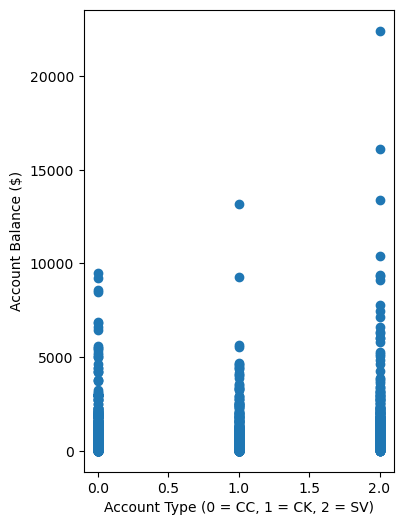

In [88]:
plt.figure(figsize=(4,6))
plt.scatter(x = Y['acct_type_dummy'], y=Y['ending_balance'])
plt.xlabel('Account Type (0 = CC, 1 = CK, 2 = SV)')
plt.ylabel('Account Balance ($)');

In [89]:
from sklearn.cluster import KMeans
km_acc = KMeans(n_clusters = 5)
km_acc.fit(Y)

KMeans(n_clusters=5)

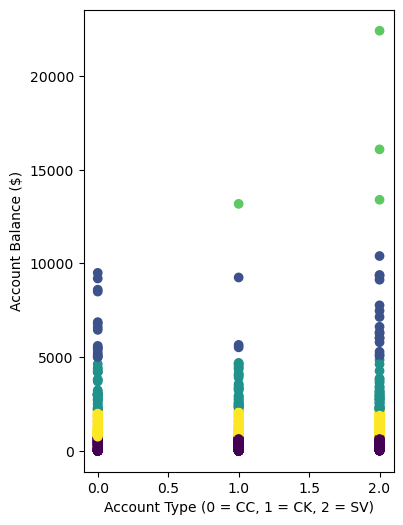

In [82]:
plt.figure(figsize=(4,6))
plt.scatter(x = Y['acct_type_dummy'], y=Y['ending_balance'], c= km_acc.labels_)
plt.xlabel('Account Type (0 = CC, 1 = CK, 2 = SV)')
plt.ylabel('Account Balance ($)');

c= km.labels_

In [99]:
wcss_acc = [] #Within cluster sum squares
for i in range(2,15):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(Y)
    wcss_acc.append(km.inertia_)

In [100]:
wcss_acc

[1482022185.7637446,
 810996509.8007221,
 492293292.3585245,
 306340461.18589073,
 204993125.81385925,
 148026726.4819102,
 101388149.90933634,
 77360316.97301371,
 56808278.416206226,
 47122457.44480005,
 39400627.871406086,
 31690214.554433446,
 27159070.531655055]

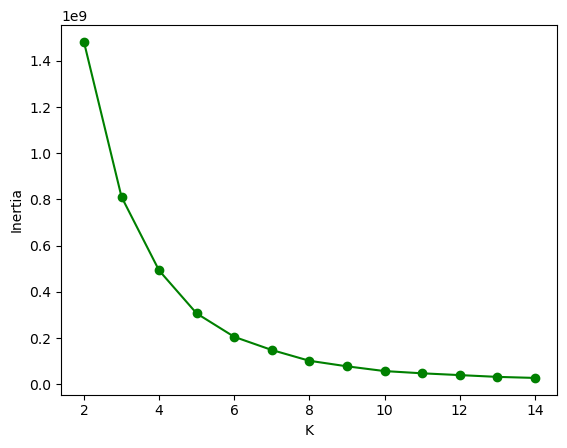

In [101]:
plt.plot(range(2,15), wcss_acc, 'og-')
plt.xlabel("K")
plt.ylabel("Inertia");